In [43]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [44]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_Nursery.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_Nursery.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_Nursery.xlsx');

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,Oral English,Evaluating,10,3,0 %,Anshuman Boro,Nursery,A,1,10.0,Pass
1,2022-2023,Formative Assessment I,Offline,Drawing,Evaluating,25,7,0 %,Anshuman Boro,Nursery,A,1,12.0,Pass
2,2022-2023,Formative Assessment I,Offline,English,Evaluating,25,7,0 %,Anshuman Boro,Nursery,A,1,17.0,Pass
3,2022-2023,Formative Assessment I,Offline,Oral Maths,Evaluating,10,3,0 %,Anshuman Boro,Nursery,A,1,8.0,Pass
4,2022-2023,Formative Assessment I,Offline,Maths,Evaluating,25,7,0 %,Anshuman Boro,Nursery,A,1,21.0,Pass


In [45]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [46]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Anshuman Boro,Nursery,A,1.0
1,Pratisha Chetri,Nursery,A,2.0
2,Nandini Jha,Nursery,A,3.0
3,Ayush Talukdar,Nursery,A,4.0
4,Rakif Hussain,Nursery,A,5.0


In [47]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;


df_new.head()      

,Student Name,Class,Section,Roll No,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_English,Formative Assessment I_Oral Maths,Formative Assessment I_Maths,Formative Assessment I_Rhymes,...,Formative Assessment-2_English,Formative Assessment-2_Oral Maths,Formative Assessment-2_Maths,Formative Assessment-2_Rhymes,Half Yearly Exam_Oral English,Half Yearly Exam_Drawing,Half Yearly Exam_English,Half Yearly Exam_Oral Maths,Half Yearly Exam_Maths,Half Yearly Exam_Rhymes
0,Anshuman Boro,Nursery,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pratisha Chetri,Nursery,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nandini Jha,Nursery,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayush Talukdar,Nursery,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Rakif Hussain,Nursery,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_English,Formative Assessment I_Oral Maths,Formative Assessment I_Maths,Formative Assessment I_Rhymes,...,Formative Assessment-2_English,Formative Assessment-2_Oral Maths,Formative Assessment-2_Maths,Formative Assessment-2_Rhymes,Half Yearly Exam_Oral English,Half Yearly Exam_Drawing,Half Yearly Exam_English,Half Yearly Exam_Oral Maths,Half Yearly Exam_Maths,Half Yearly Exam_Rhymes
0,Anshuman Boro,Nursery,A,1.0,10,12,17,8,21,25,...,15.0,8,18,21,24,37,37.0,30.0,47,50
1,Pratisha Chetri,Nursery,A,2.0,8,18,22,9,20,22,...,18.0,8,14,20,0,30,22.5,0.0,44,46
2,Nandini Jha,Nursery,A,3.0,9,14,21,8,19,24,...,24.0,8,17,18,22,36,30.0,28.0,45,50
3,Ayush Talukdar,Nursery,A,4.0,10,17,22,10,23,25,...,25.0,10,25,25,23,44,39.0,30.0,49,47
4,Rakif Hussain,Nursery,A,5.0,10,16,18,10,19,25,...,19.5,10,21,25,0,42,0.0,0.0,0,50


In [49]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_English,Formative Assessment I_Oral Maths,Formative Assessment I_Maths,Formative Assessment I_Rhymes,...,Half Yearly Exam_English,Half Yearly Exam_Oral Maths,Half Yearly Exam_Maths,Half Yearly Exam_Rhymes,Weightage Oral English,Weightage Drawing,Weightage English,Weightage Oral Maths,Weightage Maths,Weightage Rhymes
0,Anshuman Boro,Nursery,A,1.0,10,12,17,8,21,25,...,37.0,30.0,47,50,NaN,NaN,NaN,NaN,NaN,NaN
1,Pratisha Chetri,Nursery,A,2.0,8,18,22,9,20,22,...,22.5,0.0,44,46,NaN,NaN,NaN,NaN,NaN,NaN
2,Nandini Jha,Nursery,A,3.0,9,14,21,8,19,24,...,30.0,28.0,45,50,NaN,NaN,NaN,NaN,NaN,NaN
3,Ayush Talukdar,Nursery,A,4.0,10,17,22,10,23,25,...,39.0,30.0,49,47,NaN,NaN,NaN,NaN,NaN,NaN
4,Rakif Hussain,Nursery,A,5.0,10,16,18,10,19,25,...,0.0,0.0,0,50,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = df_new['Formative Assessment I_' + subject] * 0.4 + df_new['Formative Assessment-2_' + subject] * 0.4 + df_new['Half Yearly Exam_' + subject] * 0.8;

In [51]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30 else fail
for subject in subjects:
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= 30, 'Pass', 'Fail');

In [52]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_English,Formative Assessment I_Oral Maths,Formative Assessment I_Maths,Formative Assessment I_Rhymes,...,Weightage Oral Maths,Weightage Maths,Weightage Rhymes,Result Oral English,Result Drawing,Result English,Result Oral Maths,Result Maths,Result Rhymes,Total Weightage
0,Anshuman Boro,Nursery,A,1.0,10,12,17,8,21,25,...,30.4,53.2,58.4,Fail,Pass,Pass,Pass,Pass,Pass,250.8
1,Pratisha Chetri,Nursery,A,2.0,8,18,22,9,20,22,...,6.8,48.8,53.6,Fail,Pass,Pass,Fail,Pass,Pass,187.2
2,Nandini Jha,Nursery,A,3.0,9,14,21,8,19,24,...,28.8,50.4,56.8,Fail,Pass,Pass,Fail,Pass,Pass,245.2
3,Ayush Talukdar,Nursery,A,4.0,10,17,22,10,23,25,...,32.0,58.4,57.6,Fail,Pass,Pass,Pass,Pass,Pass,274.4
4,Rakif Hussain,Nursery,A,5.0,10,16,18,10,19,25,...,8.0,16.0,60.0,Fail,Pass,Fail,Fail,Fail,Pass,153.8


In [53]:
# Add a result column
df_new['Result'] = '';

# Count the no of subjects
no_of_subjects = len(subjects);

# Total full marks
total_full_marks = no_of_subjects * 100;

# Add the total marks column
df_new['Total Marks'] = total_full_marks;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] > total_full_marks * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] <= total_full_marks * 0.3, 'Result'] = 'Fail';

In [54]:
# Print the first row
df_new.iloc[0]

Student Name                           Anshuman Boro
Class                                        Nursery
Section                                            A
Roll No                                          1.0
Formative Assessment I_Oral English               10
Formative Assessment I_Drawing                    12
Formative Assessment I_English                    17
Formative Assessment I_Oral Maths                  8
Formative Assessment I_Maths                      21
Formative Assessment I_Rhymes                     25
Formative Assessment-2_Oral English                8
Formative Assessment-2_Drawing                    14
Formative Assessment-2_English                  15.0
Formative Assessment-2_Oral Maths                  8
Formative Assessment-2_Maths                      18
Formative Assessment-2_Rhymes                     21
Half Yearly Exam_Oral English                     24
Half Yearly Exam_Drawing                          37
Half Yearly Exam_English                      

In [55]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_English,Formative Assessment I_Oral Maths,Formative Assessment I_Maths,Formative Assessment I_Rhymes,...,Weightage Rhymes,Result Oral English,Result Drawing,Result English,Result Oral Maths,Result Maths,Result Rhymes,Total Weightage,Result,Total Marks
0,Anshuman Boro,Nursery,A,1.0,10,12,17,8,21,25,...,58.4,Fail,Pass,Pass,Pass,Pass,Pass,250.8,Pass,600
1,Pratisha Chetri,Nursery,A,2.0,8,18,22,9,20,22,...,53.6,Fail,Pass,Pass,Fail,Pass,Pass,187.2,Pass,600
2,Nandini Jha,Nursery,A,3.0,9,14,21,8,19,24,...,56.8,Fail,Pass,Pass,Fail,Pass,Pass,245.2,Pass,600
3,Ayush Talukdar,Nursery,A,4.0,10,17,22,10,23,25,...,57.6,Fail,Pass,Pass,Pass,Pass,Pass,274.4,Pass,600
4,Rakif Hussain,Nursery,A,5.0,10,16,18,10,19,25,...,60.0,Fail,Pass,Fail,Fail,Fail,Pass,153.8,Fail,600
5,Hardik Rout,Nursery,A,6.0,10,18,20,5,19,25,...,58.8,Fail,Pass,Pass,Fail,Pass,Pass,247.0,Pass,600
6,Priyanshi Banik,Nursery,A,7.0,4,16,13,5,5,23,...,58.4,Fail,Pass,Pass,Fail,Pass,Pass,219.6,Pass,600
7,Dhitika Barman,Nursery,A,8.0,0,16,20,5,5,23,...,57.6,Fail,Pass,Pass,Fail,Pass,Pass,248.0,Pass,600
8,Sneha Dey,Nursery,A,9.0,10,19,23,10,23,15,...,40.8,Fail,Pass,Pass,Fail,Pass,Pass,248.4,Pass,600
9,Ronak Jha,Nursery,A,10.0,8,14,23,8,11,21,...,42.4,Fail,Pass,Pass,Fail,Pass,Pass,231.6,Pass,600


In [56]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

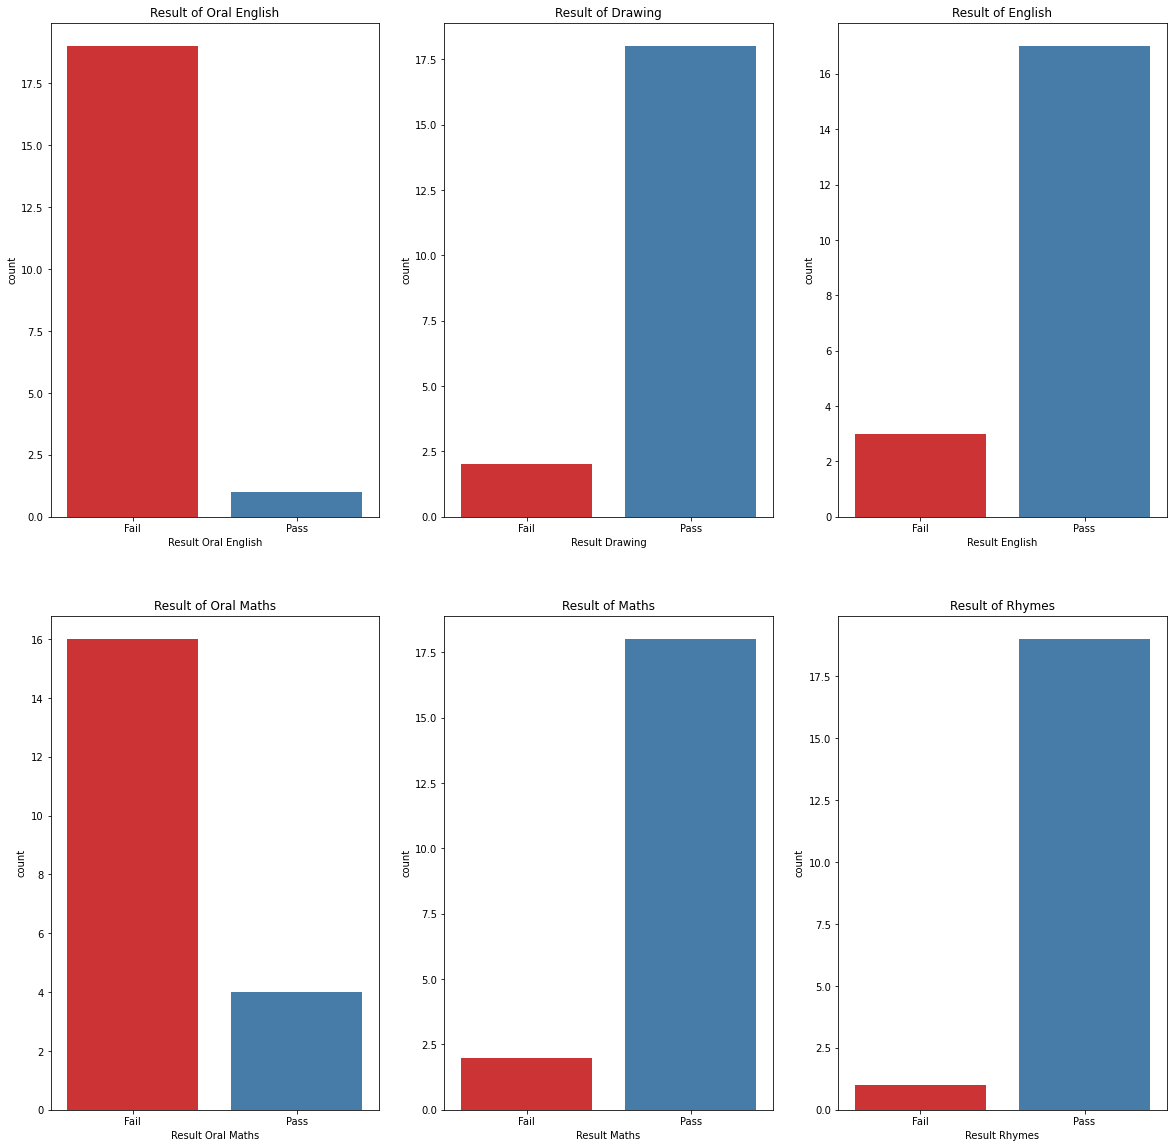

In [57]:
# Combine the charts in one figure
fig, axes = plt.subplots(2, 3, figsize=(20, 20));
for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
    axes[i // 3, i % 3].set_title('Result of ' + subject);
plt.show();